Modell A (ohne Temperatur): 35 echte Fehler erkannt von 100 Anomalien
Modell B (mit Temperatur):  37 echte Fehler erkannt von 100 Anomalien


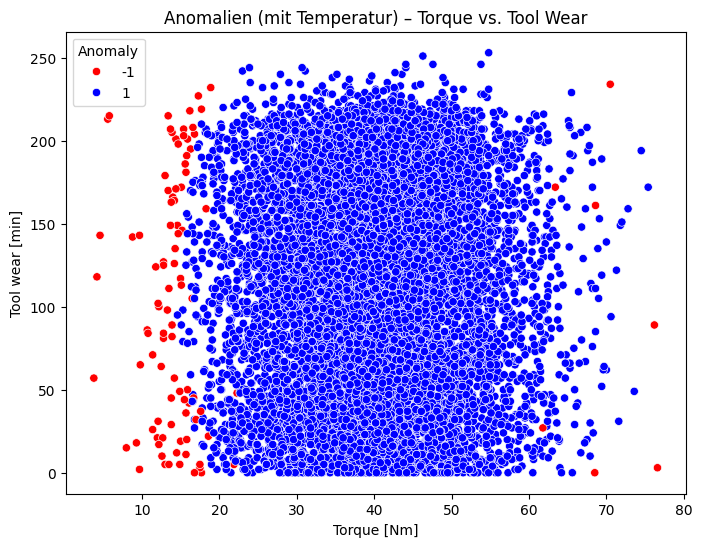

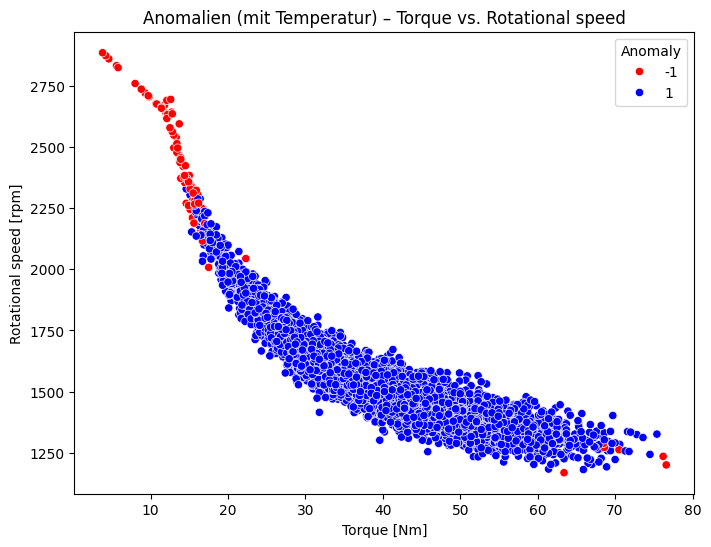

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Daten laden
df = pd.read_csv('../data/ai4i2020.csv')

# Zielspalte: Machine failure
labels = df['Machine failure']

# Feature-Sets definieren
features_a = ['Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]']  # ohne Temperatur
features_b = features_a + ['Process temperature [K]']  # mit Temperatur

def run_isolation_forest(df, features, contamination=0.01):
    model = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
    preds = model.fit_predict(df[features])
    return preds  # -1 = Anomalie, 1 = normal

# Modell A (ohne Temperatur)
df['anomaly_a'] = run_isolation_forest(df, features_a)

# Modell B (mit Temperatur)
df['anomaly_b'] = run_isolation_forest(df, features_b)

# Evaluation: Wie viele echte Fehler wurden erkannt?
def eval_model(preds, true_labels):
    pred_anomalies = (preds == -1)
    true_positives = ((true_labels == 1) & pred_anomalies).sum()
    total_anomalies = pred_anomalies.sum()
    return true_positives, total_anomalies

tp_a, total_a = eval_model(df['anomaly_a'], labels)
tp_b, total_b = eval_model(df['anomaly_b'], labels)

print(f"Modell A (ohne Temperatur): {tp_a} echte Fehler erkannt von {total_a} Anomalien")
print(f"Modell B (mit Temperatur):  {tp_b} echte Fehler erkannt von {total_b} Anomalien")

# Visualisierung: Torque vs Tool wear + Anomalien
plt.figure(figsize=(8,6))
sns.scatterplot(x='Torque [Nm]', y='Tool wear [min]', data=df, hue='anomaly_b', palette={1: 'blue', -1: 'red'})
plt.title("Anomalien (mit Temperatur) – Torque vs. Tool Wear")
plt.legend(title='Anomaly')
plt.show()

# Visualisierung: Torque vs Tool wear + Anomalien
plt.figure(figsize=(8,6))
sns.scatterplot(x='Torque [Nm]', y='Rotational speed [rpm]', data=df, hue='anomaly_b', palette={1: 'blue', -1: 'red'})
plt.title("Anomalien (mit Temperatur) – Torque vs. Rotational speed")
plt.legend(title='Anomaly')
plt.show()


In [2]:
df[df['anomaly_b'] == -1].to_csv('../data/detected_anomalies.csv', index=False)
